In [1]:
import matplotlib.pyplot as plt
import time
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [2]:
places = [
    {"mult": 24, "hunters": 2},
    {"mult": 70, "hunters": 4},
    {"mult": 41, "hunters": 3},
    {"mult": 21, "hunters": 2},
    {"mult": 60, "hunters": 4},
    {"mult": 47, "hunters": 3},
    {"mult": 82, "hunters": 5},
    {"mult": 87, "hunters": 5},
    {"mult": 80, "hunters": 5},
    {"mult": 35, "hunters": 3},
    {"mult": 73, "hunters": 4},
    {"mult": 89, "hunters": 5},
    {"mult": 100, "hunters": 8},
    {"mult": 90, "hunters": 7},
    {"mult": 17, "hunters": 2},
    {"mult": 77, "hunters": 5},
    {"mult": 83, "hunters": 5},
    {"mult": 85, "hunters": 5},
    {"mult": 79, "hunters": 5},
    {"mult": 55, "hunters": 4},
    {"mult": 12, "hunters": 2},
    {"mult": 27, "hunters": 3},
    {"mult": 52, "hunters": 4},
    {"mult": 15, "hunters": 2},
    {"mult": 30, "hunters": 3}
]

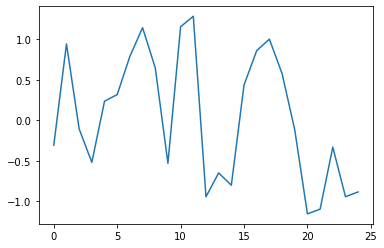

In [3]:
mult = 0
hunters = 0
for ob in places:
    mult += ob["mult"]
    hunters += ob["hunters"]
lmbd7500 = mult/(1+hunters)
p = [places[i]["mult"]/lmbd7500 - places[i]["hunters"] for i in range(25)]
plt.plot(p)
plt.show()

In [56]:
start = time.time()

M = 25
bestl = 0
bestset = []
for it in powerset([i for i in range(M)]):
    if len(it) == 0 or len(it) == M:
        continue
    mult = 0
    hunters = 0
    for i in it:
        mult += places[i]["mult"]
        hunters += places[i]["hunters"]
    l = mult/(1+hunters)
    probs = [0 for _ in range(25)]
    flag = True
    for i in it:
        probs[i] = places[i]["mult"]/l - places[i]["hunters"]
        if probs[i] > 0:
            flag = False
            break
    if not flag:
        break
    print("Optimal lambda = ", probs)
    print("Optimal set = ", list(it))
    

end = time.time()
print(end - start, "seconds elapsed")


0.0006747245788574219 seconds elapsed


In [48]:
nasheq = [0 for _ in range(25)]
for i in bestset:
    nasheq[i] = places[i]["mult"]/bestl - places[i]["hunters"]
print("Nash equilibrium = ", nasheq)


Nash equilibrium =  [0, -3.9994455445544554, 0, 0, 0, 0, 0, -4.999310891089109, 0, 0, -3.9994217821782176, -4.99929504950495, 0, 0, 0, 0, 0, -4.999326732673268, 0, 0, 0, 0, 0, 0, 0]


In [5]:
def Compute_PayOff(prob):
    return [places[i]["mult"]*7500/(prob[i]*100 + places[i]["hunters"]) for i in range(25)]

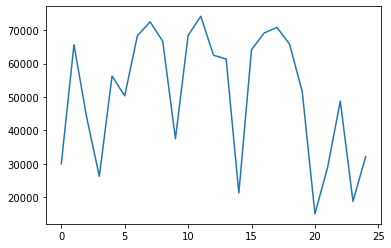

In [6]:
#naive prob
poff = Compute_PayOff([1/25 for _ in range(25)])
plt.plot(poff)
plt.show()

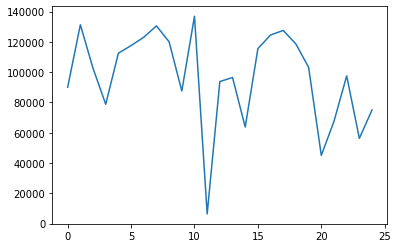

In [7]:
#best optimizer prob
poff1 = Compute_PayOff([1/25 for _ in range(25)])
m = max(poff1)
poff = Compute_PayOff([poff1[i] == m if 1 else 9 for i in range(25)])
plt.plot(poff)
plt.show()

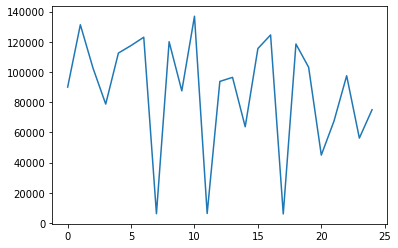

In [8]:
#top three optimizer prob
poff1 = Compute_PayOff([1/25 for _ in range(25)])
poffsorted = poff1[:]
poffsorted.sort(reverse = True)
k = 3
poff = Compute_PayOff([poffsorted[k-1] <= poff1[i] if 1/k else 0 for i in range(25)])
plt.plot(poff)
plt.show()

In [9]:
f = [[poff[i], i] for i in range(25)]
f.sort(reverse = True)
f[:3]

[[136875.0, 10], [131250.0, 1], [124500.0, 16]]